In [1]:
import pandas
import hdbscan

df = pandas.read_csv("data/similarity.csv")

In [ ]:
df["gene"] = df["gene"].str.replace("\)\.", ")")
df["compare"] = df["compare"].str.replace("\)\.", ")")

In [14]:
df.drop_duplicates(inplace=True)

In [16]:
df.head()

,gene,compare,similarity
0,NC_000913.3:4085822-4085832(-),NC_000913.3:4085822-4085832(-),1.000000
2,NC_000913.3:4085822-4085832(-),NC_000913.3:665190-665200(-),0.931295
3,NC_000913.3:665190-665200(-),NC_000913.3:4085822-4085832(-),0.931295
4,NC_000913.3:4085822-4085832(-),NC_000913.3:461904-461914(+),0.906402
5,NC_000913.3:461904-461914(+),NC_000913.3:4085822-4085832(-),0.906402


In [18]:
df.similarity.describe()

count    258276.000000
mean          0.906470
std           0.040979
min           0.663639
25%           0.887634
50%           0.911378
75%           0.934140
max           1.000000
Name: similarity, dtype: float64

In [73]:
sim_matrix = df.pivot("gene", "compare", "similarity").fillna(0)

In [74]:
sim_matrix.head()

compare,NC_000913.3:1003428-1003438(+),NC_000913.3:1004757-1004767(+),NC_000913.3:1005941-1005951(+),NC_000913.3:100754-100764(+),NC_000913.3:1007600-1007610(-),NC_000913.3:1007833-1007843(+),NC_000913.3:1009953-1009963(+),NC_000913.3:1011990-1012000(+),NC_000913.3:1013248-1013258(+),NC_000913.3:1014885-1014895(+),...,NC_000913.3:985709-985719(-),NC_000913.3:986982-986992(-),NC_000913.3:988985-988995(-),NC_000913.3:990356-990366(-),NC_000913.3:990611-990621(+),NC_000913.3:994832-994842(-),NC_000913.3:995988-995998(-),NC_000913.3:99633-99643(+),NC_000913.3:996944-996954(-),NC_000913.3:997857-997867(+)
gene,,,,,,,,,,,,,,,,,,,,,
NC_000913.3:1003428-1003438(+),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.907005,0.0,0.0,0.0,0.0,0.0,0.0
NC_000913.3:1004757-1004767(+),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.943509,0.0,0.0,0.0,0.0,0.0,0.0
NC_000913.3:1005941-1005951(+),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.939586,0.0,0.0,0.0,0.0,0.0,0.0
NC_000913.3:100754-100764(+),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.927991,0.0,0.0,0.0,0.0,0.0,0.0
NC_000913.3:1007600-1007610(-),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.938097,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
clusterer = hdbscan.HDBSCAN(metric="precomputed")
clusterer.fit(sim_matrix)

HDBSCAN(metric='precomputed')

In [81]:
clusterer.labels_.max()

1

<AxesSubplot:ylabel='$\\lambda$ value'>

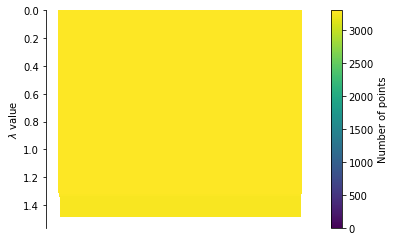

In [82]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='distance'>

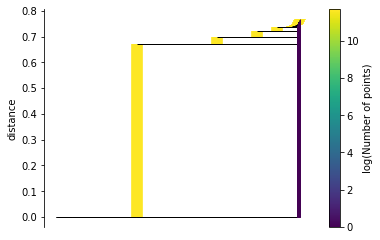

In [83]:
clusterer.single_linkage_tree_.plot()

In [84]:
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)

array([0, 0, 0, ..., 0, 0, 0])

In [187]:
df = df.set_index("sequence")

In [188]:
df.shape

(2129, 50)

In [200]:
df[df["T"] == "T"]

,T,C,T.1,T.2,T.3,T.4,T.5,G,T.6,T.7,...,C.10,A.6,A.7,T.12,C.11,T.13,A.8,T.14,A.9,C.12
sequence,,,,,,,,,,,,,,,,,,,,,
sequence,T,C,T,T,T,T,T,G,T,T,...,C,A,A,T,C,T,A,T,A,C


In [192]:
clusterer = hdbscan.HDBSCAN(
    cluster_selection_method="leaf",
    min_samples=8,
    min_cluster_size=5,
    prediction_data=True,
    approx_min_span_tree=False,
    metric="manhattan")
clusterer.fit(df)

ValueError: could not convert string to float: 'T'

In [181]:
clusterer.labels_.max()

82

In [182]:
clusterer.outlier_scores_.max()

0.8383233532934131

In [183]:
clusterer.cluster_persistence_.max()

0.07652173913043474

<AxesSubplot:ylabel='$\\lambda$ value'>

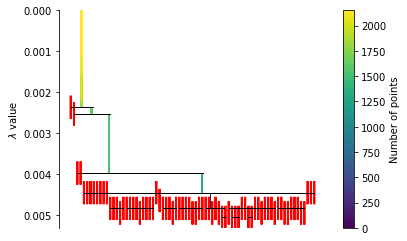

In [171]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [172]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)

In [173]:
lines, columns = soft_clusters.shape
lines, columns

(2150, 75)

In [174]:
score_df = pandas.DataFrame(
    soft_clusters.T,
    index=[f"NC_000913.3:3409058-3409108(+)_{c}" for c in range(columns)],
    columns=df.index
)

In [175]:
score_df.head()

sequence,NC_000913.3:4472348-4472398(-),NC_000913.3:3471349-3471399(-),NC_000913.3:3448708-3448758(-),NC_000913.3:3450197-3450247(-),NC_000913.3:3447727-3447777(-),NC_000913.3:3446848-3446898(-),NC_000913.3:3473491-3473541(-),NC_000913.3:3441658-3441708(-),NC_000913.3:2734252-2734302(-),NC_000913.3:3450492-3450542(-),...,NC_000913.3:4577907-4577957(-),NC_000913.3:4613484-4613534(+),NC_000913.3:516596-516646(+),NC_000913.3:527541-527591(+),NC_000913.3:796551-796601(+),NC_000913.3:995934-995984(-),NC_000913.3:1454856-1454906(+),NC_000913.3:1649041-1649091(+),NC_000913.3:1665120-1665170(+),NC_000913.3:1805272-1805322(+)
NC_000913.3:3409058-3409108(+)_0,0.009103,0.008102,0.006849,0.007183,0.007424,0.009171,0.006691,0.007963,0.008174,0.007165,...,0.007224,0.005815,0.006726,0.007023,0.006462,0.006562,0.005952,0.007209,0.005942,0.005572
NC_000913.3:3409058-3409108(+)_1,0.011829,0.008879,0.007306,0.010529,0.008615,0.010563,0.007463,0.008480,0.009280,0.010276,...,0.007748,0.006630,0.007919,0.009078,0.007722,0.008219,0.006687,0.007523,0.007979,0.006624
NC_000913.3:3409058-3409108(+)_2,0.011308,0.012329,0.009653,0.011387,0.012448,0.013519,0.007762,0.011466,0.012271,0.012822,...,0.011143,0.008121,0.012039,0.009377,0.012448,0.010495,0.013775,0.010857,0.011354,0.007335
NC_000913.3:3409058-3409108(+)_3,0.011409,0.010641,0.007996,0.011869,0.009348,0.010563,0.007867,0.010056,0.010145,0.010035,...,0.008956,0.006504,0.009186,0.007901,0.009654,0.010323,0.008729,0.009583,0.010878,0.007133
NC_000913.3:3409058-3409108(+)_4,0.010393,0.012203,0.009269,0.010413,0.011876,0.012605,0.007400,0.011201,0.012101,0.011759,...,0.010742,0.007262,0.010150,0.008449,0.011460,0.009997,0.011603,0.011126,0.010120,0.006833


In [176]:
score_df.max().max()

0.01918186076419459